## Dataset Overview

The dataset contains sensor measurements collected from a manufacturing facility over time. It includes environmental readings from multiple zones within the factory, external weather conditions, and energy consumption metrics. The primary target variable is `equipment_energy_consumption`, which represents the energy used by manufacturing equipment in Wh (watt-hours).

## Feature Descriptions

### Time Information
- `timestamp`: Date and time of the measurement (format: YYYY-MM-DD HH:MM:SS)

### Energy Metrics
- `equipment_energy_consumption`: Energy consumption of manufacturing equipment in Wh (target variable)
- `lighting_energy`: Energy consumption of lighting systems in Wh

### Zone Measurements
The factory is divided into 9 distinct zones, each equipped with temperature and humidity sensors:

#### Zone 1 - Main Production Area
- `zone1_temperature`: Temperature in Zone 1 (°C)
- `zone1_humidity`: Relative humidity in Zone 1 (%)

#### Zone 2 - Assembly Line
- `zone2_temperature`: Temperature in Zone 2 (°C)
- `zone2_humidity`: Relative humidity in Zone 2 (%)

#### Zone 3 - Quality Control
- `zone3_temperature`: Temperature in Zone 3 (°C)
- `zone3_humidity`: Relative humidity in Zone 3 (%)

#### Zone 4 - Packaging Area
- `zone4_temperature`: Temperature in Zone 4 (°C)
- `zone4_humidity`: Relative humidity in Zone 4 (%)

#### Zone 5 - Raw Material Storage
- `zone5_temperature`: Temperature in Zone 5 (°C)
- `zone5_humidity`: Relative humidity in Zone 5 (%)

#### Zone 6 - Loading Bay
- `zone6_temperature`: Temperature in Zone 6 (°C)
- `zone6_humidity`: Relative humidity in Zone 6 (%)

#### Zone 7 - Office Space
- `zone7_temperature`: Temperature in Zone 7 (°C)
- `zone7_humidity`: Relative humidity in Zone 7 (%)

#### Zone 8 - Control Room
- `zone8_temperature`: Temperature in Zone 8 (°C)
- `zone8_humidity`: Relative humidity in Zone 8 (%)

#### Zone 9 - Staff Area
- `zone9_temperature`: Temperature in Zone 9 (°C)
- `zone9_humidity`: Relative humidity in Zone 9 (%)

### External Weather Conditions
- `outdoor_temperature`: Outside temperature (°C)
- `outdoor_humidity`: Outside relative humidity (%)
- `atmospheric_pressure`: Atmospheric pressure (mm Hg)
- `wind_speed`: Wind speed (m/s)
- `visibility_index`: Visibility measure (km)
- `dew_point`: Dew point temperature (°C)

### Additional Variables
- `random_variable1`: Random variable generated for the dataset
- `random_variable2`: Random variable generated for the dataset

## Target Variable Details

The main target variable is `equipment_energy_consumption`, which represents the energy consumption of manufacturing equipment measured in watt-hours (Wh). This is a continuous variable that typically ranges from 10 to 1080 Wh in the dataset. The distribution is right-skewed, with most values concentrated in the lower range.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,BatchNormalization,Dropout,ReLU
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

import warnings
warnings.filterwarnings('ignore')

In [65]:
## load data

df = pd.read_csv("/Users/phoenix/Documents/GitHub/DS-Intern-Assignment-Vaibhav_Pandey/data/data.csv")
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


#### Data Preprocessing

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [67]:
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [68]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [69]:
df.dtypes

timestamp                        object
equipment_energy_consumption     object
lighting_energy                  object
zone1_temperature                object
zone1_humidity                   object
zone2_temperature                object
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64


In [70]:
# Convert specified columns to float

for col in ['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [71]:
df.dtypes

timestamp                        object
equipment_energy_consumption    float64
lighting_energy                 float64
zone1_temperature               float64
zone1_humidity                  float64
zone2_temperature               float64
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64


In [72]:
## Dropping rows with negative values in 'equipment_energy_consumption' and 'lighting_energy'

df = df[~(df['lighting_energy'] < 0)]
df = df[~(df['equipment_energy_consumption'] < 0)]

#### I noticed that there were some negative entries in 'equipment_energy_consumption' and 'lighting_energy', since these are units of power in Wh. It implies that there is some error in capturing the correct reading from the sensor hence i decided to remove them completelyy from the dataset.

In [73]:
df.shape

(16318, 29)

In [74]:
humidity_columns = [col for col in df.columns if 'humidity' in col.lower() and col != 'outdoor_humidity']

# Combine all humidity columns (including outdoor_humidity)
all_humidity_columns = humidity_columns + ['outdoor_humidity']

invalid_humidity_mask = df[all_humidity_columns].lt(0).any(axis=1)

affected_rows_count = invalid_humidity_mask.sum()

In [75]:
print(f"Affected rows: {affected_rows_count}")
print(f"Percentage of dataset affected: {affected_rows_count / len(df) * 100:.2f}%")

Affected rows: 2337
Percentage of dataset affected: 14.32%


In [76]:
def drop_negative_humidity(df):
    """
    Function to drop rows with negative humidity values.
    Action:
    Drop rows with negative humidity values in any humidity-related column.
    """
    
    humidity_cols = [col for col in df.columns if "humidity" in col.lower()]
    mask = (df[humidity_cols] < 0).any(axis=1)
    print(f"Dropping {mask.sum()} rows with negative humidity values.")

    df_cleaned = df[~mask].reset_index(drop=True)
    return df_cleaned

In [77]:
df = drop_negative_humidity(df)
df.shape

Dropping 2337 rows with negative humidity values.


(13981, 29)

#### I noticed that there were some negative entries in the humidity-related columns, including 'zone1_humidity' to 'zone9_humidity' and 'outdoor_humidity'. Since humidity is a percentage and cannot logically take negative values, this implies an error in capturing the correct readings from the sensors. Upon analysis, I found that 2,337 rows (14.32% of the dataset) had at least one invalid humidity value. To ensure data quality and avoid introducing bias through imputation, I decided to remove these rows entirely from the dataset.

In [78]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    779
lighting_energy                 722
zone1_temperature               782
zone1_humidity                  733
zone2_temperature               749
zone2_humidity                  733
zone3_temperature               678
zone3_humidity                  754
zone4_temperature               667
zone4_humidity                  661
zone5_temperature               699
zone5_humidity                  690
zone6_temperature               714
zone6_humidity                  723
zone7_temperature               650
zone7_humidity                  689
zone8_temperature               712
zone8_humidity                  659
zone9_temperature               639
zone9_humidity                  733
outdoor_temperature             681
atmospheric_pressure            696
outdoor_humidity                685
wind_speed                      712
visibility_index                671
dew_point                       689
random_variable1            

In [79]:
## Convert the 'timestamp' column to datetime format

df['timestamp'] = pd.to_datetime(df['timestamp'])

print(df.dtypes)
df.head()

timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                        float64
zone1_temperature                      float64
zone1_humidity                         float64
zone2_temperature                      float64
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         float64
outdoor_tempe

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:10:00,60.0,30.0,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
1,2016-01-11 17:20:00,50.0,30.0,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
2,2016-01-11 17:30:00,50.0,40.0,33.746609,46.066667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
3,2016-01-11 17:40:00,60.0,40.0,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097
4,2016-01-11 17:50:00,50.0,40.0,19.890000,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,17.000000,NaN,6.016667,734.0,92.0,5.333333,43.833333,4.800000,44.919484,NaN


In [80]:
#  Drop rows with missing target

df = df.dropna(subset=["equipment_energy_consumption"])

In [81]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption      0
lighting_energy                 670
zone1_temperature               736
zone1_humidity                  693
zone2_temperature               711
zone2_humidity                  694
zone3_temperature               636
zone3_humidity                  699
zone4_temperature               627
zone4_humidity                  623
zone5_temperature               652
zone5_humidity                  643
zone6_temperature               671
zone6_humidity                  681
zone7_temperature               601
zone7_humidity                  652
zone8_temperature               673
zone8_humidity                  626
zone9_temperature               599
zone9_humidity                  691
outdoor_temperature             647
atmospheric_pressure            661
outdoor_humidity                645
wind_speed                      670
visibility_index                631
dew_point                       637
random_variable1            

### Handling Missing Values

In [82]:
# Impute missing values

for col in df.columns:
    if col != 'equipment_energy_consumption' and df[col].isnull().any():
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)

In [83]:
df.isnull().sum()

timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
dtype: int64

### Feature Engineering

In [84]:
# Extracting date and time features from the timestamp

df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,month,day,dayofweek,hour
0,2016-01-11 17:10:00,60.0,30.0,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,1,11,0,17
1,2016-01-11 17:20:00,50.0,30.0,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,1,11,0,17
2,2016-01-11 17:30:00,50.0,40.0,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,...,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,1,11,0,17
3,2016-01-11 17:40:00,60.0,40.0,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,1,11,0,17
4,2016-01-11 17:50:00,50.0,40.0,19.890000,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,92.0,5.333333,43.833333,4.800000,44.919484,24.780874,1,11,0,17


In [85]:
# Drop the original timestamp column

df.drop(['timestamp'], axis=1, inplace=True)
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,month,day,dayofweek,hour
0,60.0,30.0,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,1,11,0,17
1,50.0,30.0,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,1,11,0,17
2,50.0,40.0,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,45.723333,...,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,1,11,0,17
3,60.0,40.0,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,1,11,0,17
4,50.0,40.0,19.890000,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,...,92.0,5.333333,43.833333,4.800000,44.919484,24.780874,1,11,0,17


In [86]:
## create new features based on zone temperature and humidity

zone_temp_cols = []
zone_humid_cols = []

for col in df.columns:
    if "zone" in col and "temperature" in col:
        zone_temp_cols.append(col)
    elif "zone" in col and "humidity" in col:
        zone_humid_cols.append(col)
        
# create new features based on temperature and humidity

df["mean_zone_temperature"] = df[zone_temp_cols].mean(axis=1)
df["mean_zone_humidity"] = df[zone_humid_cols].mean(axis=1)
df["temperature_diff"] = df["outdoor_temperature"] - df["mean_zone_temperature"]
df["humidity_diff"] = df["outdoor_humidity"] - df["mean_zone_humidity"]

df["zone_temperature_std"] = df[zone_temp_cols].std(axis=1)
df["zone_humidity_std"] = df[zone_humid_cols].std(axis=1)
df["zone_temperature_range"] = df[zone_temp_cols].max(axis=1) - df[zone_temp_cols].min(axis=1)

In [87]:
# Weather interactions

df['temp_humidity_interaction'] = df['outdoor_temperature'] * df['outdoor_humidity']

In [88]:
# Lag features (using 1-hour lag)

df['energy_lag_1'] = df['equipment_energy_consumption'].shift(1)

In [89]:
# Rolling statistics

df['rolling_3h_mean'] = df['equipment_energy_consumption'].rolling(window=3).mean()

In [90]:
# Handle missing values

df['energy_lag_1'].fillna(method='bfill', inplace=True)
df['rolling_3h_mean'].fillna(method='bfill', inplace=True)

In [91]:
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,mean_zone_temperature,mean_zone_humidity,temperature_diff,humidity_diff,zone_temperature_std,zone_humidity_std,zone_temperature_range,temp_humidity_interaction,energy_lag_1,rolling_3h_mean
0,60.0,30.0,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.149630,50.028302,-10.666296,41.971698,4.025668,13.850293,13.056667,596.466667,60.0,53.333333
1,50.0,30.0,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,19.206794,50.628889,-12.840127,41.371111,7.500334,12.757790,29.361144,585.733333,60.0,53.333333
2,50.0,40.0,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,45.723333,...,18.762216,55.663222,-12.512216,36.336778,6.971894,19.395616,27.313276,575.000000,50.0,53.333333
3,60.0,40.0,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,15.679242,50.732963,-9.545909,41.267037,5.916547,13.355827,15.413489,564.266667,50.0,53.333333
4,50.0,40.0,19.890000,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,...,17.267037,50.255926,-11.250370,41.744074,4.243146,13.978409,13.590000,553.533333,60.0,53.333333


### Exploratory Data Analysis

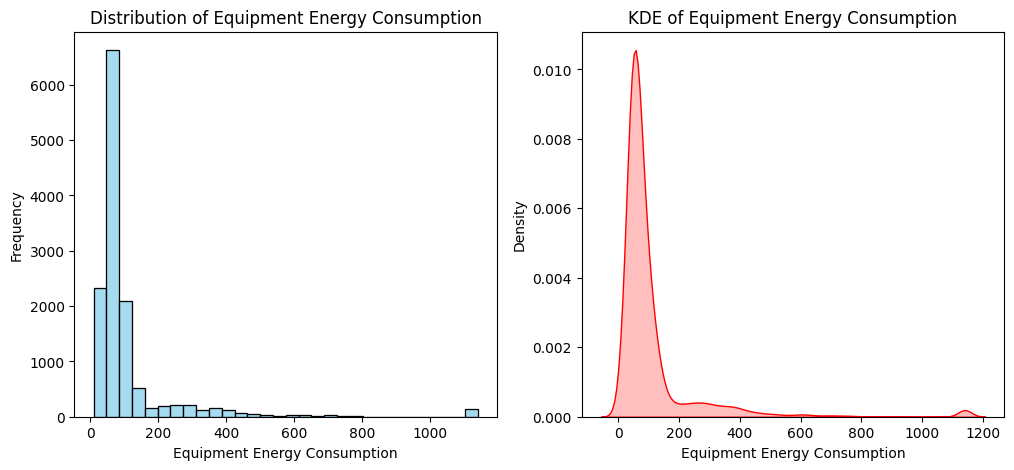

In [92]:
## Checking distribution of target variable

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['equipment_energy_consumption'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Equipment Energy Consumption')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.kdeplot(df['equipment_energy_consumption'], color='red', shade=True)
plt.title('KDE of Equipment Energy Consumption')
plt.xlabel('Equipment Energy Consumption')
plt.show()

#### Energy consumption is right-skewed, with most values concentrated below 150 Wh. A few outliers extend beyond 1000 Wh.

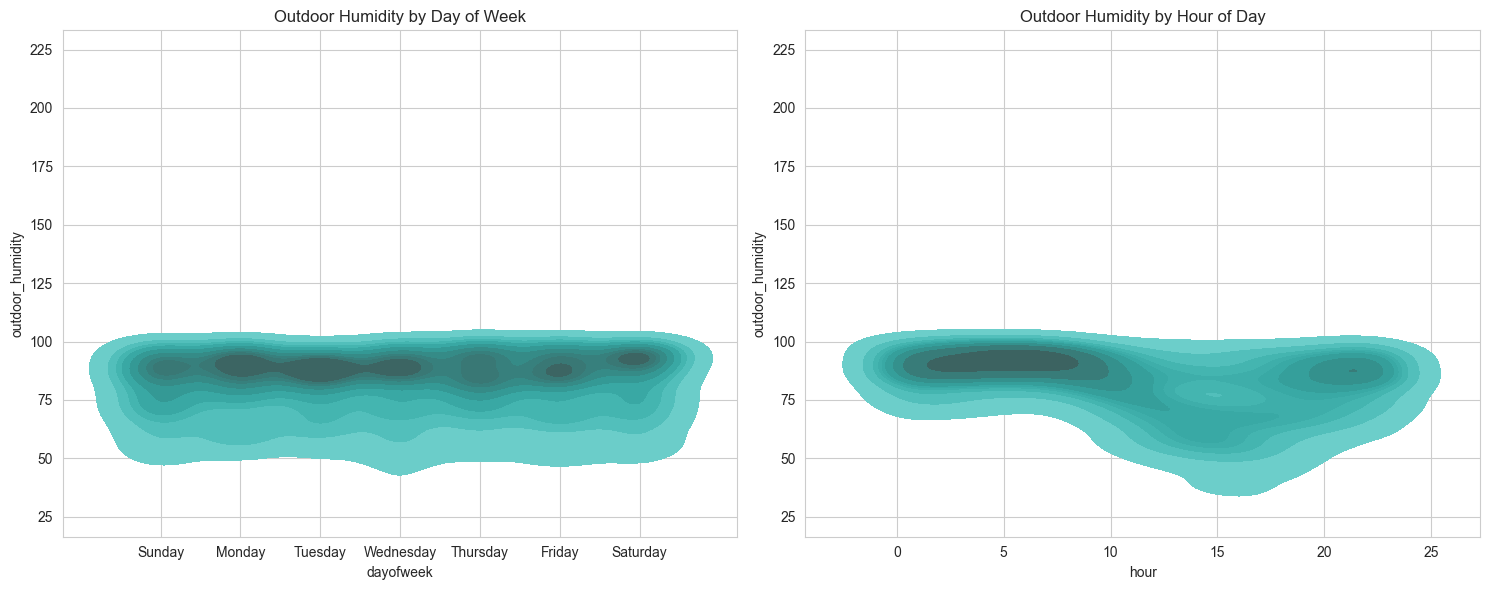

In [93]:
## KDE plots for outdoor humidity and temperature

plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot 1: Outdoor Humidity vs Day of Week
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='dayofweek', y='outdoor_humidity', color='mediumturquoise', fill=True)
ax = plt.gca()
ax.set_xticks(range(7))
ax.set_xticklabels(days)
plt.title('Outdoor Humidity by Day of Week')

# Plot 2: Outdoor Humidity vs Hour of Day
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='hour', y='outdoor_humidity', color='mediumturquoise', fill=True)
plt.title('Outdoor Humidity by Hour of Day')

plt.tight_layout()
plt.show()

#### Outdoor humidity remains fairly stable across the week. Hourly patterns show higher humidity early in the morning (around 5–7 AM) and lower levels during afternoon hours.

In [94]:
## Grouping by day of week and hour to get mean outdoor humidity

humidity_by_day = df.groupby('dayofweek')['outdoor_humidity'].mean()
humidity_by_hour = df.groupby('hour')['outdoor_humidity'].mean()

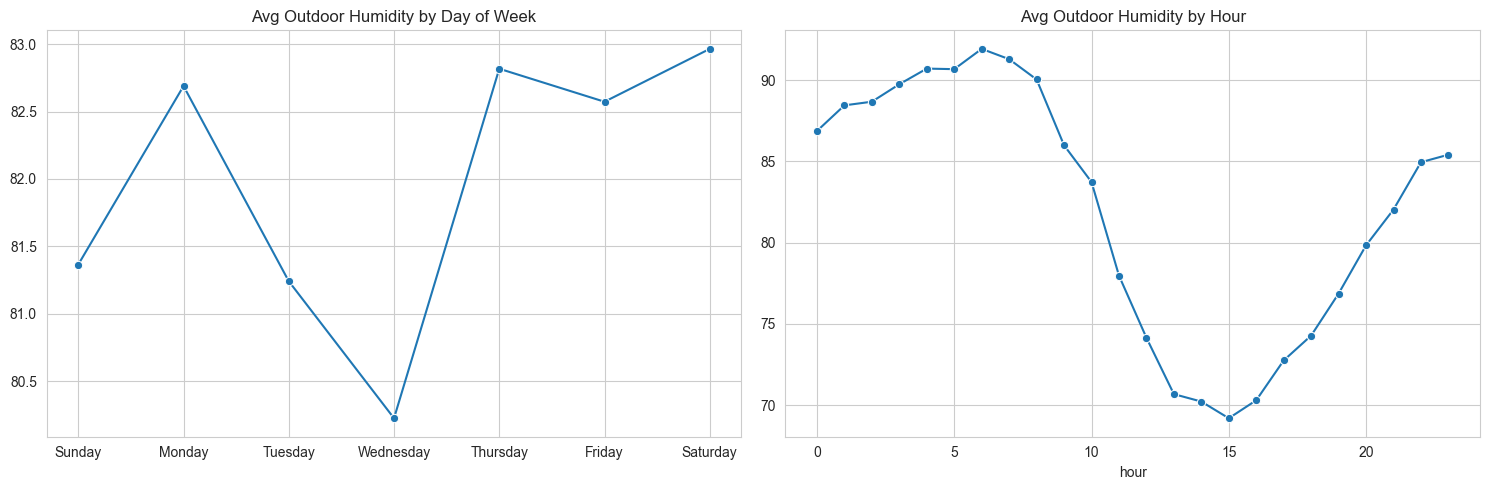

In [95]:
## Plotting mean outdoor humidity by day of week and hour

plt.figure(figsize=(15, 5))

# Mean Outdoor Humidity by Day of Week
plt.subplot(1, 2, 1)
sns.lineplot(x=days, y=humidity_by_day.values, marker='o')
plt.title("Avg Outdoor Humidity by Day of Week")

# Mean Outdoor Humidity by Hour
plt.subplot(1, 2, 2)
sns.lineplot(x=humidity_by_hour.index, y=humidity_by_hour.values, marker='o')
plt.title("Avg Outdoor Humidity by Hour")

plt.tight_layout()
plt.show()

#### Outdoor humidity is highest early in the morning (5–7 AM) and lowest in the afternoon (2–3 PM). Weekly variation is minimal, with slightly higher humidity on Saturday and Monday. These time-based patterns could help improve energy consumption predictions.

In [96]:
## Convert month number to month name

df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])

In [97]:
## Grouping by month name to get mean outdoor humidity

monthly_avg_humidity = df.groupby('month')['outdoor_humidity'].mean()
month_names = [calendar.month_name[i] for i in monthly_avg_humidity.index]

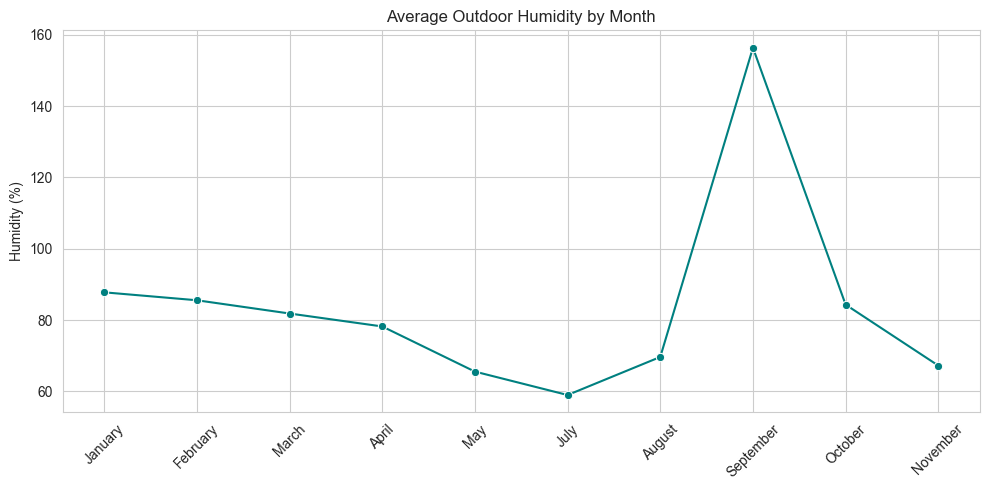

In [98]:
## Plotting mean outdoor humidity by month

plt.figure(figsize=(10, 5))
sns.lineplot(x=month_names, y=monthly_avg_humidity.values, marker='o', color='teal')
plt.title('Average Outdoor Humidity by Month')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Humidity generally declines from January to July, then spikes sharply in September, likely due to seasonal weather patterns.

In [99]:
## Grouping by month to get mean outdoor temperature

monthly_avg_temp = df.groupby('month')['outdoor_temperature'].mean()
month_names = [calendar.month_name[i] for i in monthly_avg_temp.index]

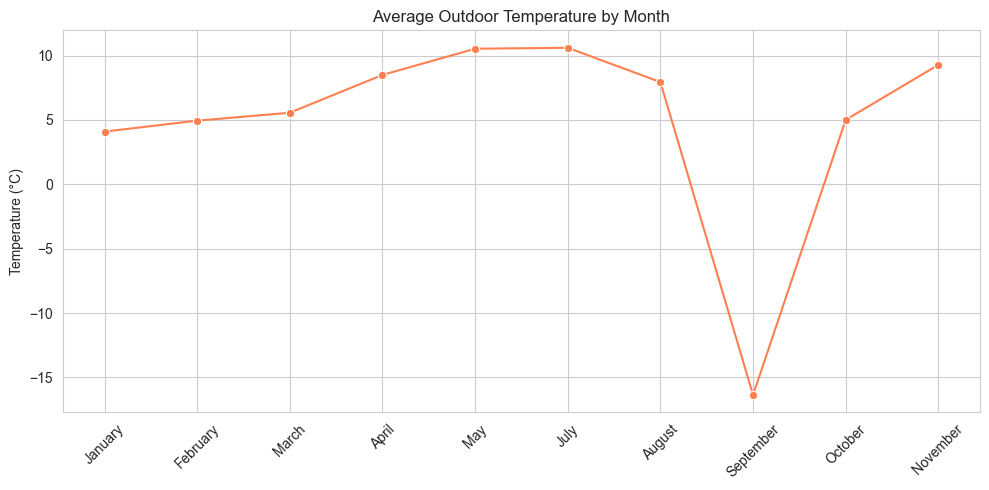

In [100]:
## plotting mean outdoor temperature by month

plt.figure(figsize=(10, 5))
sns.lineplot(x=month_names, y=monthly_avg_temp.values, marker='o', color='coral')
plt.title('Average Outdoor Temperature by Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Outdoor temperature rises steadily from January to July, then drops sharply in September, followed by a quick recovery in October.

In [101]:
## Grouping by day of week and hour to get mean outdoor temperature

hourly_avg_temp = df.groupby('hour')['outdoor_temperature'].mean()
avg_temp_by_day = df.groupby('dayofweek')['outdoor_temperature'].mean()

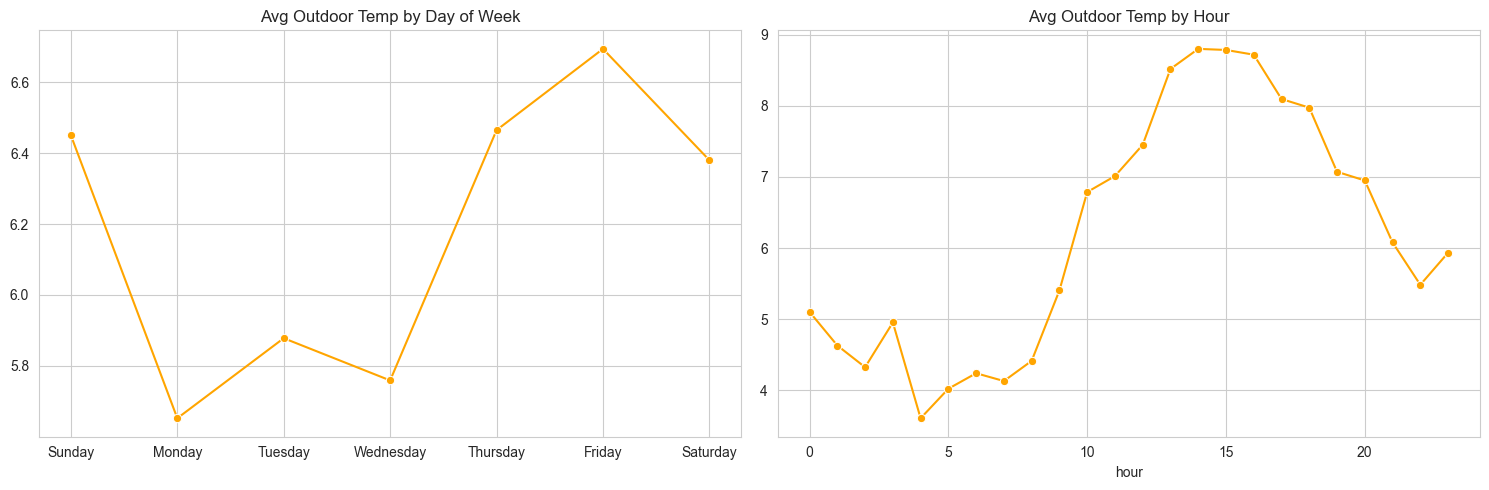

In [102]:
## Plotting average outdoor temperature by day of week and hour

plt.figure(figsize=(15, 5))

# Mean Outdoor Temp by Day of Week
plt.subplot(1, 2, 1)
sns.lineplot(x=days, y=avg_temp_by_day.values, marker='o',color='orange')
plt.title("Avg Outdoor Temp by Day of Week")

# Mean Outdoor Temp by Hour
plt.subplot(1, 2, 2)
sns.lineplot(x=hourly_avg_temp.index, y=hourly_avg_temp.values, marker='o',color='orange')
plt.title("Avg Outdoor Temp by Hour")

plt.tight_layout()
plt.show()

#### By Day: Temps are coolest on Monday, peaking on Friday.
#### By Hour: Temperature rises after 9 AM, peaking between 2–4 PM, then gradually drops.

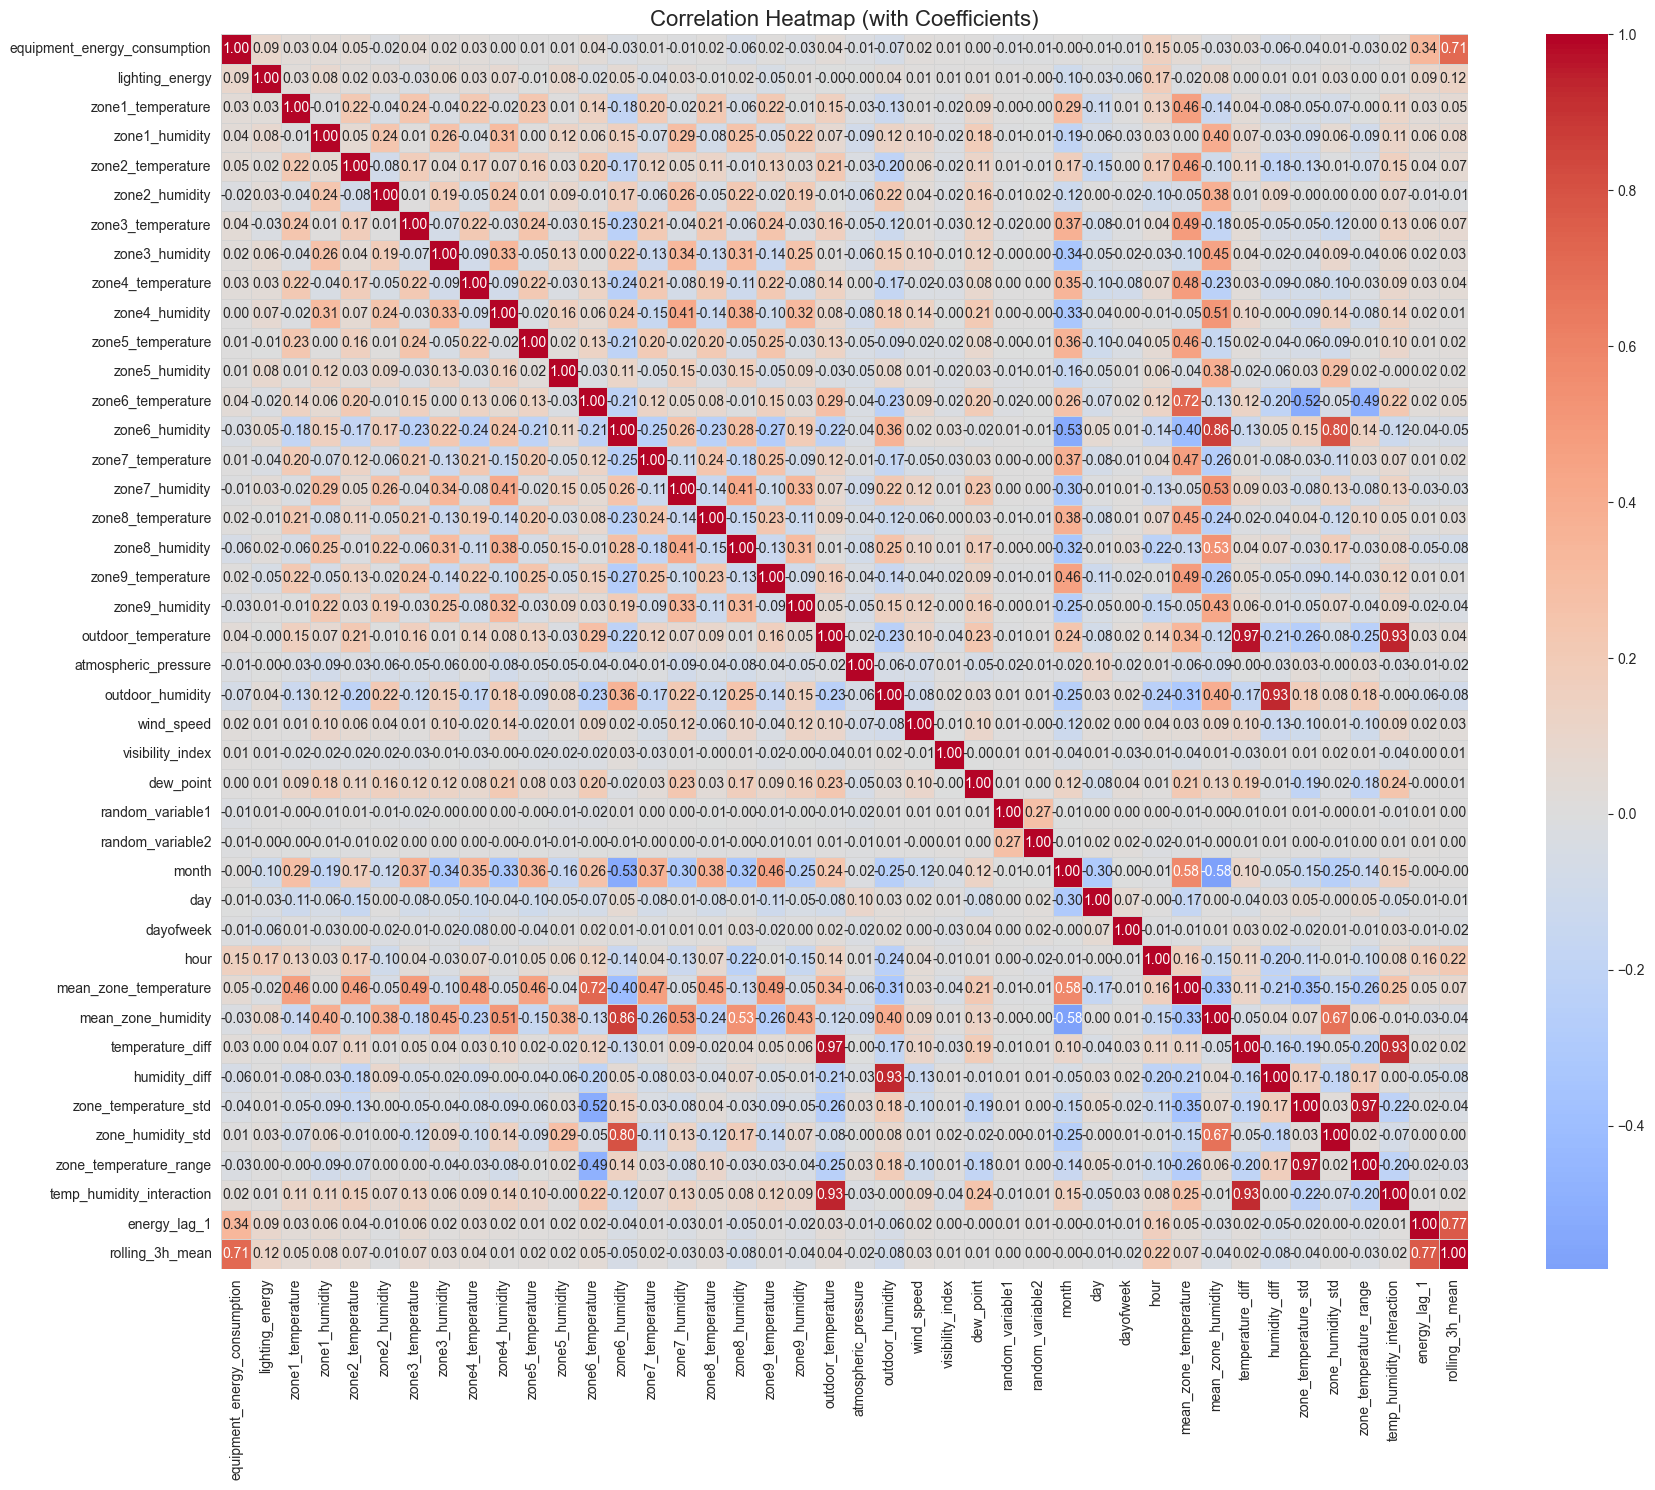

In [103]:
## Plotting Correlation Heatmap

plt.figure(figsize=(18, 15))
corr = df.corr(numeric_only=True)

# Annotate with correlation scores
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='lightgray')

plt.title("Correlation Heatmap (with Coefficients)", fontsize=16)
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()

## Decision Regarding 'random_varibale1' and 'random_varibale2'

We can observe from the correlation matrix that both of these variables do not have significant correlation with any of the other variables meaning that they are not carrying redundant information. However i decided to futher investigate the affect of these two variables in predicting the target variable using an appropriate hypothesis test.

### Linear Regression Coefficient t-test

Fitting a multiple linear regression model:

H0 (null hypothesis): regression coefficient of predictor variable(beta) = 0 (the variable has no effect)

H1 (alternative hypothesis): regression coefficient of predictor variable(beta) <> 0 (the variable significantly affects energy consumption)

Interpret the p-values:

If p-value < 0.05, reject H₀ : the variable is significantly predictive.

In [104]:
X = df[['random_variable1', 'random_variable2']]
y = df['equipment_energy_consumption']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     equipment_energy_consumption   R-squared:                       0.000
Model:                                      OLS   Adj. R-squared:                  0.000
Method:                           Least Squares   F-statistic:                     1.907
Date:                          Fri, 09 May 2025   Prob (F-statistic):              0.149
Time:                                  21:58:46   Log-Likelihood:                -84800.
No. Observations:                         13202   AIC:                         1.696e+05
Df Residuals:                             13199   BIC:                         1.696e+05
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

### Analyzing the result:

R-squared = 0.000: The model explains 0% of the variance in 'equipment_energy_consumption'. This means the predictors have no explanatory power.

F-statistic = 1.934, p-value (Prob F-statistic) = 0.145:

This tests the overall significance of the regression.

Since p > 0.05, the model is not statistically significant overall.

### Conclusion:

beta1 (random_variable1) = –0.0728 : means a small negative association, but not statistically significant (p = 0.165)

beta2 (random_variable2) = –0.0517 : also small and not significant (p = 0.337)

Both p-values are greater than 0.05, so we fail to reject the null hypothesis: neither variable has a statistically significant effect on the target.

Hence I decided to remove both the columns.

In [105]:

df.drop(['random_variable1', 'random_variable2','month_name'],axis =1,inplace=True)

In [106]:
df.drop(['temp_humidity_interaction','temperature_diff','humidity_diff','zone_temperature_range'], axis=1, inplace=True)

####  Dropping redundant features which shows high correlation among themselves, hence of no use in our model building.

In [107]:
# Remove duplicate rows

df.drop_duplicates(inplace=True)

### Outlier detection and treatment

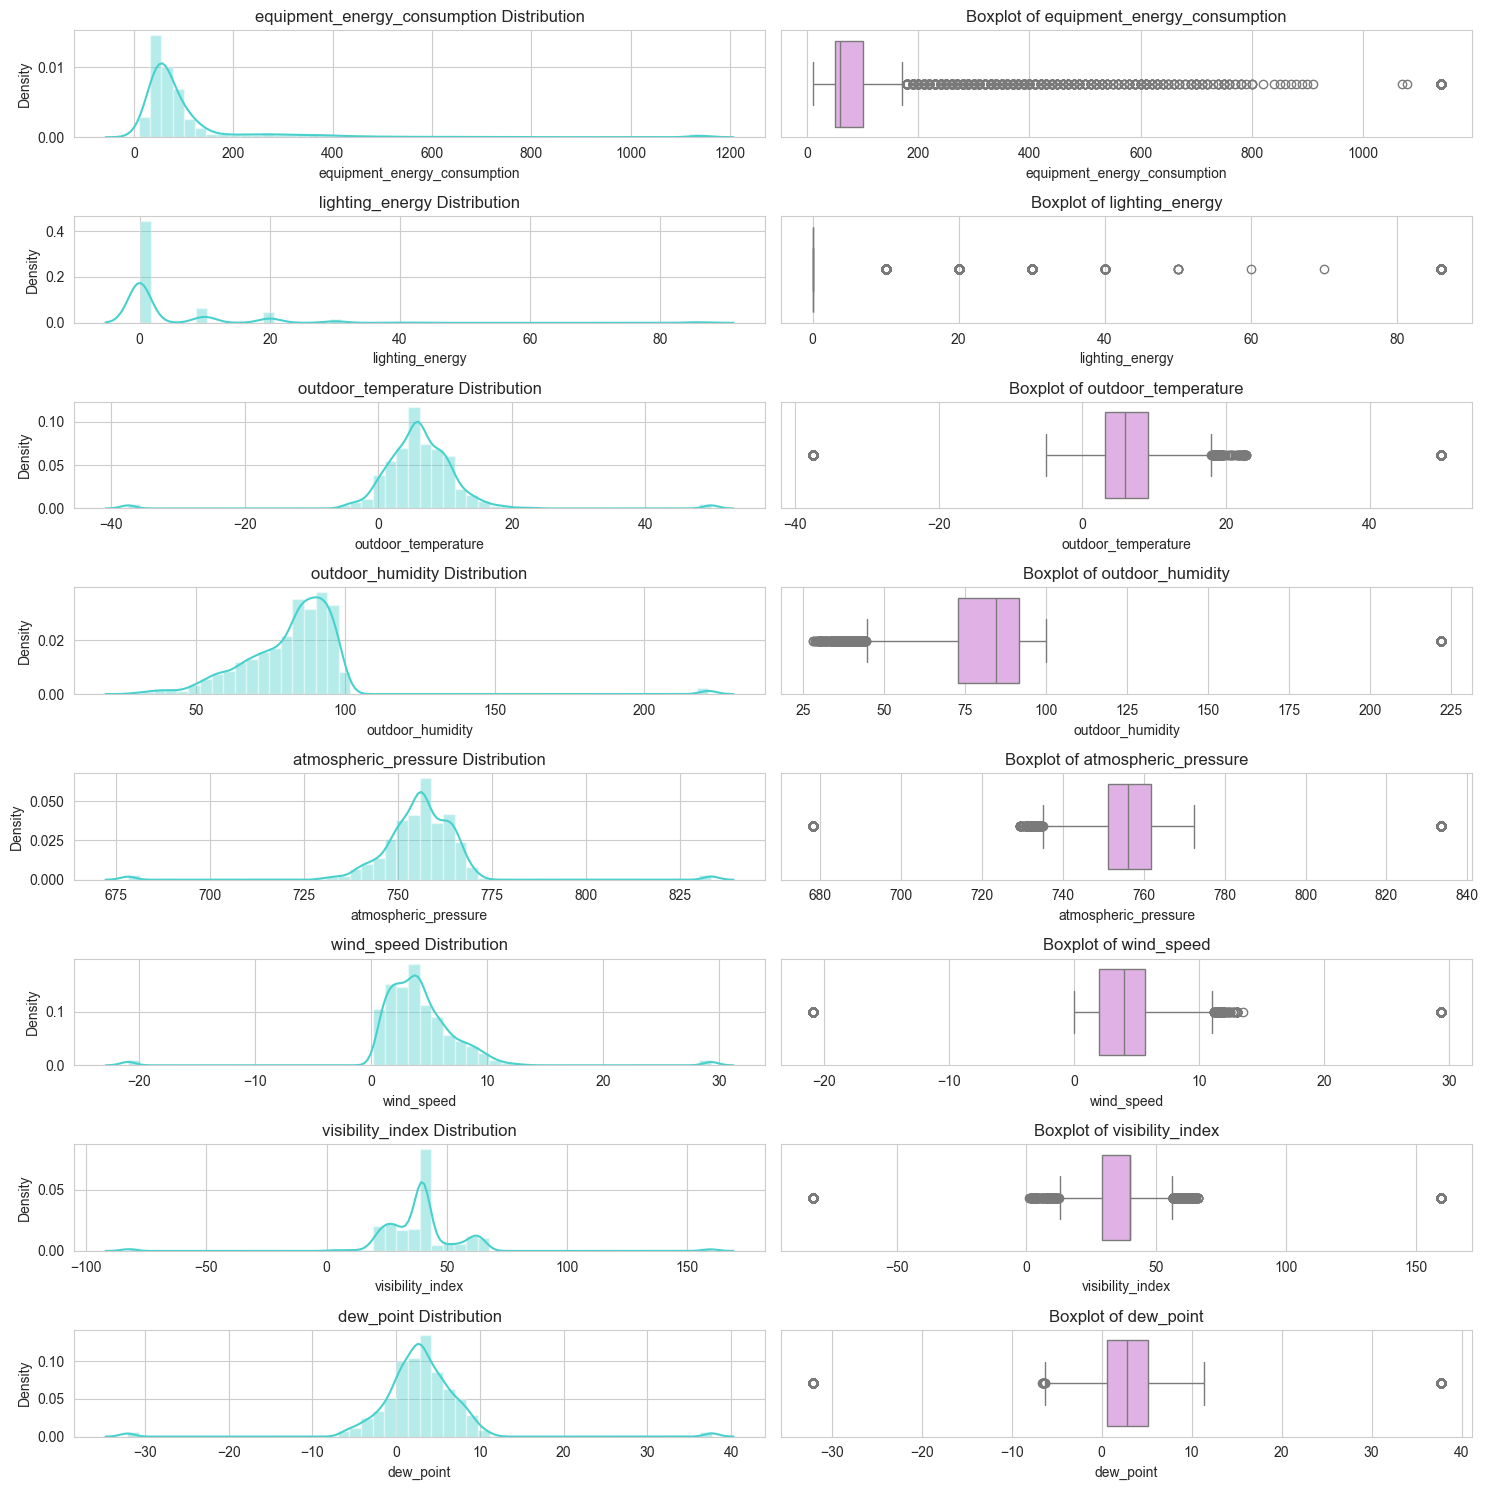

In [108]:
### Checking for outliers

num_cols = ['equipment_energy_consumption', 'lighting_energy','outdoor_temperature', 'outdoor_humidity', 'atmospheric_pressure', 'wind_speed', 'visibility_index', 'dew_point' ]

fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(15, 15))

for i, col in enumerate(num_cols):
    sns.distplot(df[col], ax=ax[i, 0], color='mediumturquoise')
    sns.boxplot(data=df, x=df[col], ax=ax[i, 1], color='#E6A9EC')
    ax[i, 0].set_title(f"{col} Distribution")
    ax[i, 1].set_title(f"Boxplot of {col}")


plt.tight_layout()

In [109]:
numeric_features = df.select_dtypes(include='number').columns

# Outlier detection using IQR method
outlier_summary = []

for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary.append({
        "Feature": col,
        "Num_Outliers": len(outliers),
        "Percent_Outliers": round(100 * len(outliers) / len(df), 2)
    })


outlier_df = pd.DataFrame(outlier_summary).sort_values(by="Percent_Outliers", ascending=False)
outlier_df.reset_index(drop=True, inplace=True)
outlier_df.head(15)

,Feature,Num_Outliers,Percent_Outliers
0,lighting_energy,3139,23.79
1,visibility_index,2003,15.18
2,rolling_3h_mean,1810,13.72
3,energy_lag_1,1584,12.00
4,equipment_energy_consumption,1584,12.00
5,zone5_humidity,1046,7.93
6,zone1_temperature,607,4.60
7,zone2_temperature,520,3.94
8,zone4_temperature,491,3.72
9,zone2_humidity,464,3.52


In [110]:
clip_features = ['lighting_energy','visibility_index']

for col in clip_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

#### Identified and clipped outliers for features where more than 15% of the values lie outside the typical range (e.g., beyond 1.5×IQR from Q1/Q3). This was done to reduce the influence of extreme values without removing significant portions of the data.

In [111]:
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,month,day,dayofweek,hour,mean_zone_temperature,mean_zone_humidity,zone_temperature_std,zone_humidity_std,energy_lag_1,rolling_3h_mean
0,60.0,0.0,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,1,11,0,17,17.149630,50.028302,4.025668,13.850293,60.0,53.333333
1,50.0,0.0,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,45.890000,...,1,11,0,17,19.206794,50.628889,7.500334,12.757790,60.0,53.333333
2,50.0,0.0,33.746609,46.066667,19.2,44.590000,19.79,45.000000,20.290000,45.723333,...,1,11,0,17,18.762216,55.663222,6.971894,19.395616,50.0,53.333333
3,60.0,0.0,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,1,11,0,17,15.679242,50.732963,5.916547,13.355827,50.0,53.333333
4,50.0,0.0,19.890000,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,...,1,11,0,17,17.267037,50.255926,4.243146,13.978409,60.0,53.333333


### Scaling & Train-Test Split

In [112]:
X = df.drop('equipment_energy_consumption', axis=1)
y = df['equipment_energy_consumption']

In [113]:
X.shape

(13196, 35)

In [114]:
y.shape

(13196,)

In [115]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [116]:
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size = 0.25,random_state = 42)

In [117]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
X_test = scaler.transform(X_test)

### Model Building

In [118]:
def evaluate_model(name, model, x_val, y_val):
    """
    Function to evaluate the model on validation data.
    """
    y_pred = model.predict(x_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    print(f"\n{name} Validation Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    return rmse, mae, r2

#### Linear Regression Model

In [119]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [120]:
evaluate_model("Linear Regression", lr_model, x_val, y_val)


Linear Regression Validation Results:
RMSE: 92.66
MAE: 35.26
R² Score: 0.59


(np.float64(92.66378131515097), 35.25591902260195, 0.5895248806491289)

#### Linear Regression with L2 regularisation

In [121]:
ridge = Ridge(alpha=0.01)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

In [122]:
evaluate_model("Ridge Regression", ridge, x_val, y_val)


Ridge Regression Validation Results:
RMSE: 92.66
MAE: 35.26
R² Score: 0.59


(np.float64(92.66375225381532), 35.25588044064368, 0.5895251381165705)

#### Linear Regression using Polynomial Features

In [123]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

LinearRegression()

In [124]:
evaluate_model("Polynomial Regression (Degree=2)", poly_model, x_val_poly, y_val)


Polynomial Regression (Degree=2) Validation Results:
RMSE: 103.06
MAE: 43.23
R² Score: 0.49


(np.float64(103.06053887823336), 43.22631034805473, 0.49224802787759125)

#### Linear Regression using PCA

In [125]:
pca = PCA(n_components=25)
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.transform(x_val)

lr_pca_model = LinearRegression()
lr_pca_model.fit(x_train_pca, y_train)

LinearRegression()

In [126]:
evaluate_model("Linear Regression with PCA", lr_pca_model, x_val_pca, y_val)
print("→ Number of Components Used:", pca.n_components_)


Linear Regression with PCA Validation Results:
RMSE: 120.83
MAE: 47.70
R² Score: 0.30
→ Number of Components Used: 25


In [127]:
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [128]:
dt_model = DecisionTreeRegressor(random_state=42)

dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=3,
                       n_jobs=-1, scoring='r2', verbose=2)
dt_grid.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=2)

In [129]:
evaluate_model("Decision Tree (Tuned)", dt_grid.best_estimator_, x_val, y_val)


Decision Tree (Tuned) Validation Results:
RMSE: 105.39
MAE: 40.91
R² Score: 0.47


(np.float64(105.38881111076522), 40.91293290424176, 0.46904732699715246)

#### XGBosst

In [130]:
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [131]:
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=3,
                        n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
xgb_grid.fit(x_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END co

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [132]:
evaluate_model("XGBoost (Tuned)", xgb_grid.best_estimator_, x_val, y_val)


XGBoost (Tuned) Validation Results:
RMSE: 94.27
MAE: 34.24
R² Score: 0.58


(np.float64(94.26531474118862), 34.241363428995314, 0.575213559937958)

#### Neural Network

In [133]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    Dense(32, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    ReLU(),
    Dense(1, activation="linear")
])

In [134]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 192 (768.00 B)

In [135]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[MeanSquaredError(name='mse'), MeanAbsoluteError(name='mae')]
)

In [136]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Wait 10 epochs after val loss stops improving
    restore_best_weights=True
)

In [137]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # Reduce LR by 80% when plateau
    patience=5,
    min_lr=1e-6
)

In [138]:
ModelCheckpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_reg.h5',
                                                            
                                                            save_best_only=True
                                                             )

In [139]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr,ModelCheckpointCallback],
    verbose=1
)

Epoch 1/100
246/248 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 34467.8828 - mae: 108.4291 - mse: 34467.0000

248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34467.9961 - mae: 108.4187 - mse: 34467.1133 - val_loss: 29391.5977 - val_mae: 101.3598 - val_mse: 29390.7148 - learning_rate: 0.0010
Epoch 2/100
218/248 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 31586.6309 - mae: 102.9795 - mse: 31585.7773

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 31452.4609 - mae: 102.6947 - mse: 31451.6074 - val_loss: 25424.1484 - val_mae: 95.2565 - val_mse: 25423.3047 - learning_rate: 0.0010
Epoch 3/100
227/248 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 29800.9043 - mae: 97.2588 - mse: 29800.0586

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 29429.1348 - mae: 96.7066 - mse: 29428.2910 - val_loss: 19661.2988 - val_mae: 84.6837 - val_mse: 19660.4453 - learning_rate: 0.0010
Epoch 4/100
212/248 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 22831.3652 - mae: 83.4737 - mse: 22830.5078

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 22481.3008 - mae: 82.8456 - mse: 22480.4414 - val_loss: 14828.7520 - val_mae: 71.8738 - val_mse: 14827.8760 - learning_rate: 0.0010
Epoch 5/100
200/248 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 17853.0801 - mae: 71.6051 - mse: 17852.2051

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17470.4355 - mae: 70.8446 - mse: 17469.5605 - val_loss: 11957.6562 - val_mae: 60.8951 - val_mse: 11956.7656 - learning_rate: 0.0010
Epoch 6/100
237/248 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 13729.1514 - mae: 60.2265 - mse: 13728.2510

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 13700.7373 - mae: 60.1625 - mse: 13699.8369 - val_loss: 10047.7637 - val_mae: 50.4065 - val_mse: 10046.8447 - learning_rate: 0.0010
Epoch 7/100
246/248 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 11991.0059 - mae: 53.1472 - mse: 11990.0742

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11985.5820 - mae: 53.1373 - mse: 11984.6514 - val_loss: 9473.0781 - val_mae: 44.9055 - val_mse: 9472.1201 - learning_rate: 0.0010
Epoch 8/100
235/248 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 10857.5234 - mae: 48.9203 - mse: 10856.5576

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 10882.3584 - mae: 48.9003 - mse: 10881.3916 - val_loss: 9072.2783 - val_mae: 38.6267 - val_mse: 9071.2725 - learning_rate: 0.0010
Epoch 9/100
235/248 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 10470.9590 - mae: 46.9981 - mse: 10469.9404

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 10480.7812 - mae: 46.9750 - mse: 10479.7617 - val_loss: 8904.8213 - val_mae: 37.5487 - val_mse: 8903.7871 - learning_rate: 0.0010
Epoch 10/100
227/248 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 10970.8223 - mae: 46.0353 - mse: 10969.7832

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 10945.9688 - mae: 46.0303 - mse: 10944.9287 - val_loss: 8837.5977 - val_mae: 36.3629 - val_mse: 8836.5352 - learning_rate: 0.0010
Epoch 11/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 9980.4180 - mae: 44.7860 - mse: 9979.3525 - val_loss: 8925.7910 - val_mae: 37.0847 - val_mse: 8924.7158 - learning_rate: 0.0010
Epoch 12/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 9863.0908 - mae: 44.3206 - mse: 9862.0127 - val_loss: 8887.1387 - val_mae: 36.2327 - val_mse: 8886.0371 - learning_rate: 0.0010
Epoch 13/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 10604.6006 - mae: 46.0039 - mse: 10603.4971 - val_loss: 8944.6719 - val_mae: 36.6144 - val_mse: 8943.5479 - learning_rate: 0.0010
Epoch 14/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 9970.3945 - mae: 45.2434 - mse: 9969.2705 - val_loss: 8883.0801 - val_mae: 36.4346 - val_mse: 8881.9336 - learning_rate: 0.0010
Epoch 15/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 903u

In [140]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

mae = history.history["mae"]
val_mae = history.history["val_mae"]

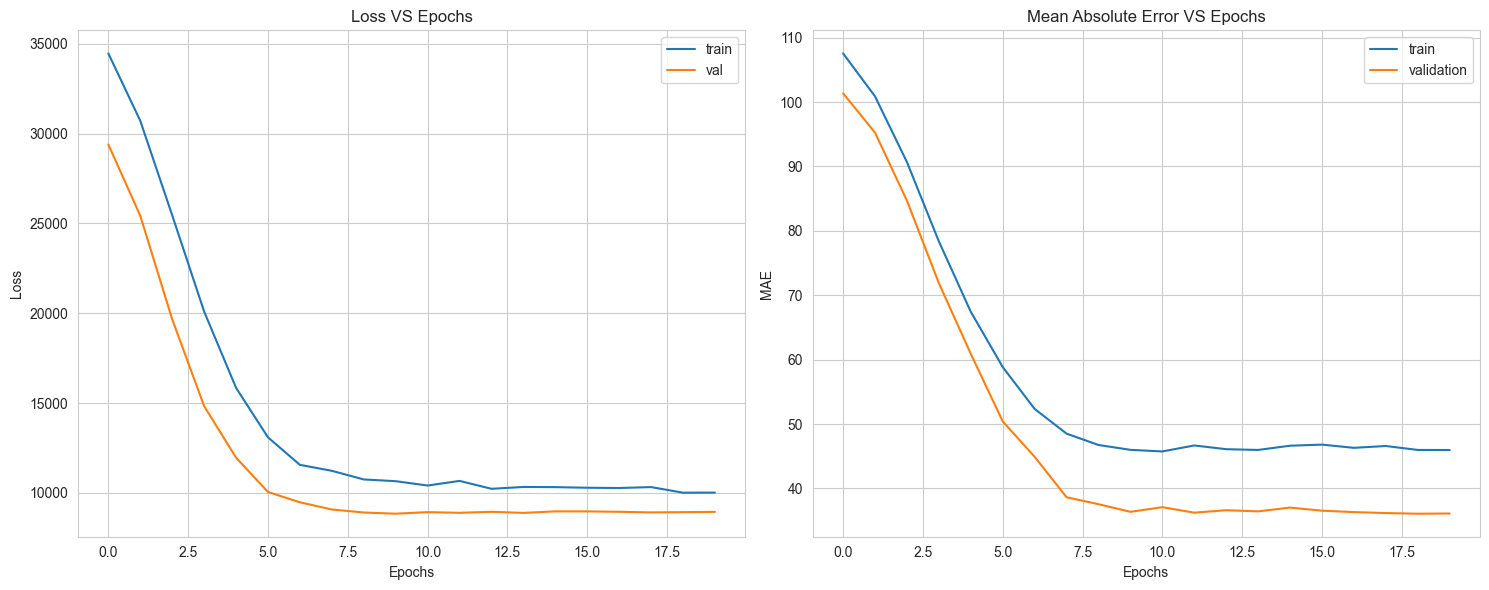

In [141]:
plt.figure(figsize = (15,6))
sns.set_style("whitegrid")

plt.subplot(1,2,1)
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="val")
plt.legend()
plt.title("Loss VS Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(epochs, mae, label="train")
plt.plot(epochs, val_mae, label="validation")
plt.legend()
plt.title("Mean Absolute Error VS Epochs")
plt.xlabel("Epochs")
plt.ylabel("MAE")

plt.tight_layout()
plt.show()

In [142]:
model.save("best_model_reg.h5")

In [143]:
y_pred = model.predict(x_val)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print results
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
RMSE: 94.0028
MAE: 36.3629
R² Score: 0.5776


#### Support Vector Machine

In [144]:
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(x_train, y_train)

SVR(C=100)

In [145]:
evaluate_model("SVR", svr_model, x_val, y_val)


SVR Validation Results:
RMSE: 98.66
MAE: 35.78
R² Score: 0.53


(np.float64(98.66004731434357), 35.77920600182071, 0.534682442476513)

### Evaluating test dataset with best model based on validation results.

In [146]:
y_lr_pred = lr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, y_lr_pred))
mae_lr = mean_absolute_error(Y_test, y_lr_pred)
r2_lr = r2_score(Y_test, y_lr_pred)

print(f"Linear Regression Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

Linear Regression Performance:
RMSE: 91.6756
MAE: 35.7185
R² Score: 0.5698


In [147]:
models = [
    "Linear Regression", "Ridge Regression", "Polynomial Regression (Deg=2)",
    "Linear Regression + PCA", "Decision Tree (Tuned)", "XGBoost (Tuned)",
    "Neural Network", "SVR"
]

In [148]:
rmse = [92.66, 92.66, 103.06, 120.83, 105.39, 94.27, 94.2393, 98.66]
mae = [35.26, 35.26, 43.23, 47.70, 40.91, 34.24, 36.9918, 35.78]
r2 = [0.59, 0.59, 0.49, 0.30, 0.47, 0.58, 0.5754, 0.53]

df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse,
    'MAE': mae,
    'R2 Score': r2
})

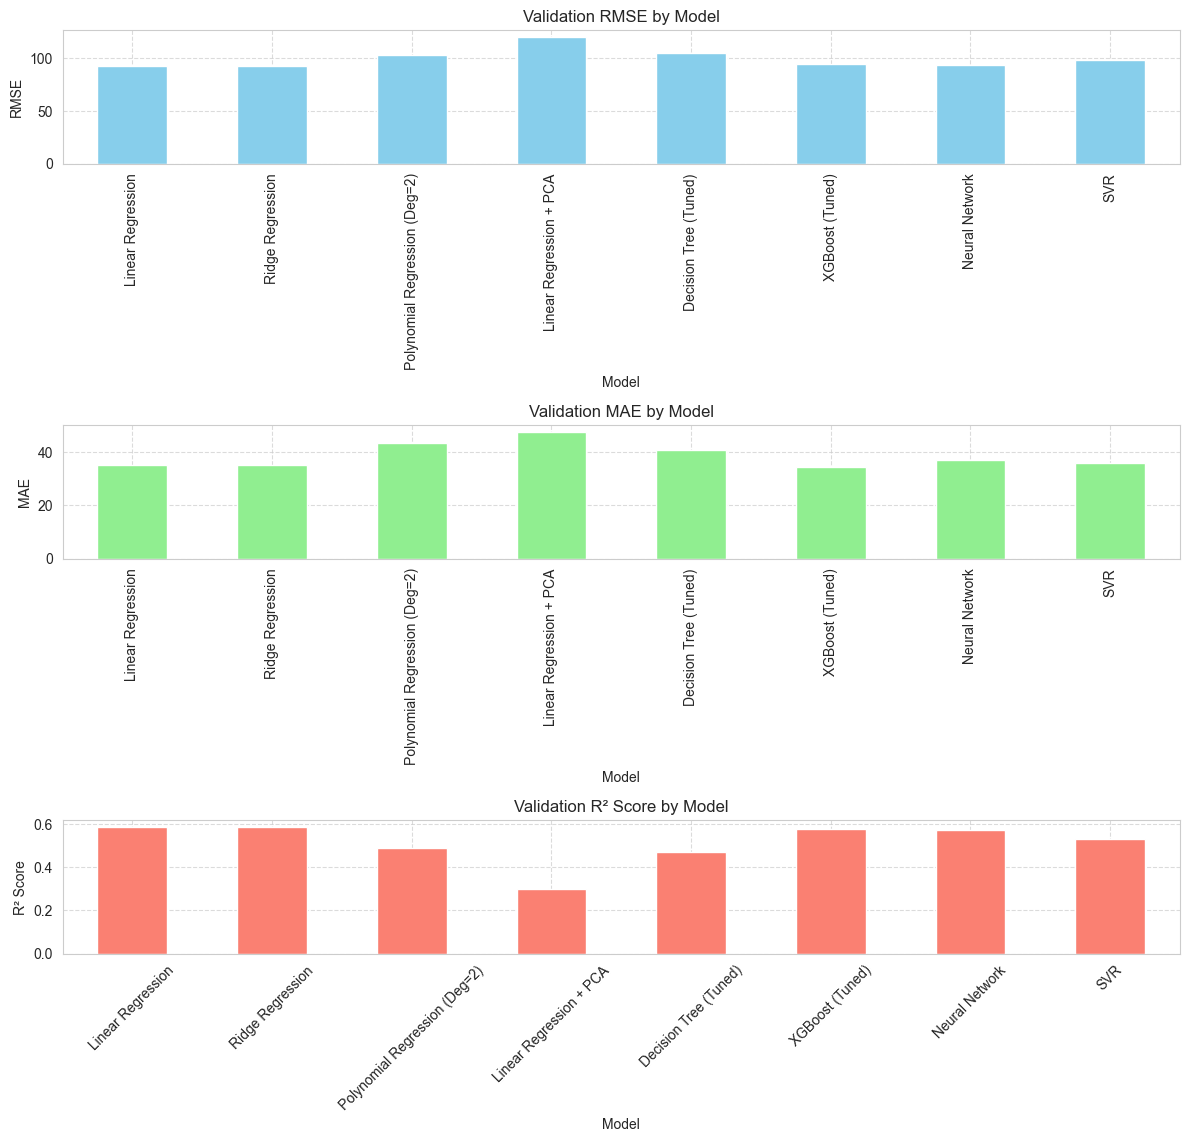

In [149]:
# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
df.plot.bar(x='Model', y='RMSE', ax=axes[0], legend=False, color='skyblue')
axes[0].set_title('Validation RMSE by Model')
axes[0].set_ylabel('RMSE')
axes[0].grid(True, linestyle='--', alpha=0.7)

df.plot.bar(x='Model', y='MAE', ax=axes[1], legend=False, color='lightgreen')
axes[1].set_title('Validation MAE by Model')
axes[1].set_ylabel('MAE')
axes[1].grid(True, linestyle='--', alpha=0.7)

df.plot.bar(x='Model', y='R2 Score', ax=axes[2], legend=False, color='salmon')
axes[2].set_title('Validation R² Score by Model')
axes[2].set_ylabel('R² Score')
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

 ### Model Performance Summary Report | Validation Set Evaluation

| Model                             | RMSE   | MAE   | R² Score |
| --------------------------------- | ------ | ----- | -------- |
| **Linear Regression**             | 92.66  | 35.26 | 0.59     |
| **Ridge Regression**              | 92.66  | 35.26 | 0.59     |
| **Polynomial Regression (Deg=2)** | 103.06 | 43.23 | 0.49     |
| **Linear Regression + PCA**       | 120.83 | 47.70 | 0.30     |
| **Decision Tree (Tuned)**         | 105.39 | 40.91 | 0.47     |
| **XGBoost (Tuned)**               | 94.27  | 34.24 | 0.58     |
| **Neural Network**                | 94.47  | 37.12 | 0.5754   |
| **SVR**                           | 98.66  | 35.78 | 0.53     |

### Test Set Evaluation (Best Model: Linear Regression)

| Metric   | Value  |
| -------- | ------ |
| **RMSE** | 91.68  |
| **MAE**  | 35.72  |
| **R²**   | 0.5698 |

### Conclusion :
Linear Regression and Ridge Regression achieved the best overall performance on the validation set, with the lowest RMSE (92.66) and highest R² score (0.59).

XGBoost had the lowest MAE (34.24), making it a strong contender in terms of error minimization.

Polynomial Regression and PCA-based models performed poorly, likely due to overfitting or information loss.

The final test set evaluation using Linear Regression confirms consistent performance, with RMSE = 91.68 and R² ≈ 0.57.